# Example usage

`mods`, which stands for "mechanics of deformable solids" is a python package that implements various equations from the textbook "Mechanics of Materials" by R.C. Hibbeler (9th edition). My intention with `mods` is to aid instructors and students alike in teaching (learning) solid mechanics at the undergraduate level. Presently, `mods` only supports plane stress and strain analyses.

Here, I will demonstrate some functions from `mods`. `mods` was made with the engineering student in mind; most functions should be straight forward to use.

## Stress Transformation

Suppose we transform an element shown in a) into the element shown by b):

![](images/example_1_jupyter.jpg)

Working this problem out by hand is a little bit laborous, but not too bad:

![](images/example_3_jupyter.png)

Using `mods`, this problem is a breeze. We can easily determine the transformed stresses (in MPa):

In [4]:
from mods.stress_transformation import normal_stress_transform, shear_stress_transform

print(f'Transformed normal stresses (sigma x prime, sigma y prime): {normal_stress_transform(-80, 50, -25, -30)}')
print(f'Transformed shear stress: {shear_stress_transform(-80, 50, -25, -30)}')

Transformed normal stresses (sigma x prime, sigma y prime): (-25.84936490538904, -4.1506350946109585)
Transformed shear stress: -68.79165124598852


## Von Mises Failure Envelope

Here's a fun problem from Hibbeler (9th edition):

![](images/example_2_jupyter.jpg)

The first step is to determine the yield strength of A-36 steel. Luckily, you don't have to flip through Hibbeler to the back pages of the textbook:

In [7]:
from mods.datasets import get_mechanical_properties_si

mech_props_df = get_mechanical_properties_si()
mech_props_df.iloc[:, [0, 1, 3, 8, 9]]

,Material Family,Material,Density (g/m3),Tens. Yield Strength (MPa),Comp. Yield Strength (MPa)
0,Aluminum,2014-T6,2790000,414.0,414.0
1,Wrought Alloys,6061-T6,2710000,255.0,255.0
2,Cast Iron Alloys,Gray ASTM 20,7190000,NaN,NaN
3,Cast Iron Alloys,Malleable ASTM A-197,7280000,NaN,NaN
4,Copper Alloys,Red Brass C83400,8740000,70.0,70.0
5,Copper Alloys,Bronze C86100,8830000,345.0,345.0
6,Magnesium Alloy,[Am 1004-T611],1830000,152.0,152.0
7,Steel Alloys,Structural A-36,7850000,250.0,250.0
8,Steel Alloys,Structural A992,7850000,345.0,345.0
9,Steel Alloys,Stainless 304,7860000,207.0,207.0


We can see that the yield strength of A-36 structural steel (in both tension and compression) is 250 MPa. We can use this to plot the Von Mises failure envelope:

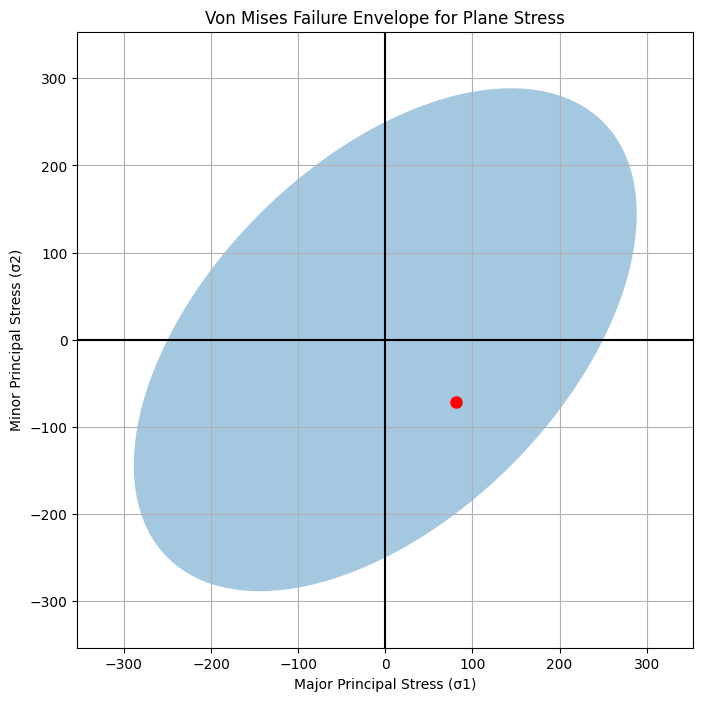

In [6]:
from mods.failure import plot_von_mises_failure_envelope

plot_von_mises_failure_envelope(250, 70, -60, 40)

The red dot indicates our stress state. We can see that the dot lies within the failure envelope for A-36 steel, which means our material is not expected to fail at the stress state specified by the problem.